# 1. IMPORT REQUIRED LIBRARIES

In [ ]:
import  torch
import  torch.nn as nn
import  torch.optim as optim
import  numpy as np
from  torchvision import datasets, transforms
from  matplotlib import pyplot as plt

# 2. BASIC SETTINGS

In [ ]:
batch_size=200
learning_rate=0.1
epochs=35

# 3. PREPARE CIFAR-10 DATASET

In [ ]:
train_loader = torch.utils.data.DataLoader( datasets.CIFAR10('../data', train=True, download=True,
                                                             transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])),
                                                             batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.CIFAR10('../data', train=False,
                                                             transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])),
                                                             batch_size=batch_size, shuffle=False)

Files already downloaded and verified


# 4. DEFINE THE MODEL

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(  # 3*32*32 = 3 channels, 32 by 32 pixels -> CIFAR-10 image size
            nn.Linear(3*32*32, 512), # Increased first layer size for more capacity, flatten image into vector form
            nn.ReLU(),
            nn.Linear(512, 256),     # New layer with 256 units
            nn.ReLU(),
            nn.Linear(256, 128),     # Reduce layer size
            nn.ReLU(),
            nn.Linear(128, 10)       # Output layer
        )

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        return self.model(x)

# 5. CUDA, OPTIMIZER, LOSS FUNCTION

In [ ]:
device = torch.device('cuda:0')
net = MLP().to(device)
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
criteon = nn.CrossEntropyLoss().to(device)

# 6. START TRAINING

In [ ]:
for epoch in range(epochs):  # Output epoch/iteration, loss, and training accuracy
    train_loss = 0  # Initialize loss
    train_acc = 0  # Initialize accuracy
    for data, target in train_loader:   # loop data batches
        data = data.view(-1, 3*32*32)   # 3*32*32 is CIFAR-10 size
        data, target = data.to(device), target.to(device)
        logits = net(data)
        loss = criteon(logits, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _,pred = logits.max(1)
        num_correct = (pred==target).sum().item()
        acc = num_correct / data.shape[0]   # calculate accuracy
        train_acc += acc

        train_loss += loss.item()

    print('Train Epoch: {} Loss: {:.6f} Training Accuracy: {:.6f}'.format(
        epoch+1, train_loss/len(train_loader), train_acc/len(train_loader)))

Train Epoch: 1 Loss: 0.253175 Training Accuracy: 0.913240
Train Epoch: 2 Loss: 0.259560 Training Accuracy: 0.913120
Train Epoch: 3 Loss: 0.224712 Training Accuracy: 0.922820
Train Epoch: 4 Loss: 0.200401 Training Accuracy: 0.931880
Train Epoch: 5 Loss: 0.207464 Training Accuracy: 0.932360
Train Epoch: 6 Loss: 0.194223 Training Accuracy: 0.933980
Train Epoch: 7 Loss: 0.175350 Training Accuracy: 0.941600
Train Epoch: 8 Loss: 0.154230 Training Accuracy: 0.949700
Train Epoch: 9 Loss: 0.121321 Training Accuracy: 0.959460
Train Epoch: 10 Loss: 0.154776 Training Accuracy: 0.951380
Train Epoch: 11 Loss: 0.111368 Training Accuracy: 0.964300
Train Epoch: 12 Loss: 0.075860 Training Accuracy: 0.975460
Train Epoch: 13 Loss: 0.114041 Training Accuracy: 0.961400
Train Epoch: 14 Loss: 0.103101 Training Accuracy: 0.965620
Train Epoch: 15 Loss: 0.105998 Training Accuracy: 0.968140
Train Epoch: 16 Loss: 0.121191 Training Accuracy: 0.959580
Train Epoch: 17 Loss: 0.113794 Training Accuracy: 0.963560
Train 

# 7. EVALUATE THE MODEL

In [ ]:
correct = 0  # Initialize correct predictions
for data, target in test_loader:
    data = data.view(-1, 32 * 32 * 3)
    data, target = data.to(device), target.cuda()
    logits = net(data)

    pred = logits.argmax(dim=1)
    correct += pred.eq(target).float().sum().item()

total_num = len(test_loader.dataset)
acc = correct / total_num
print('test accuracy:', acc)    # test data accuracy

test accuracy: 0.5609


# 8. MAKE PREDICTIONS

In [ ]:
def plot_image(img, prediction, label):
    for i in range(6):
        plt.imshow(np.transpose(img[i], (1, 2, 0)),interpolation="nearest") # Reorder image to 32x32 pixels with 3 channels (RGB)
        plt.title("Prediction = {} Label = {}".format(prediction[i].item(),label[i].item()))
        plt.show()

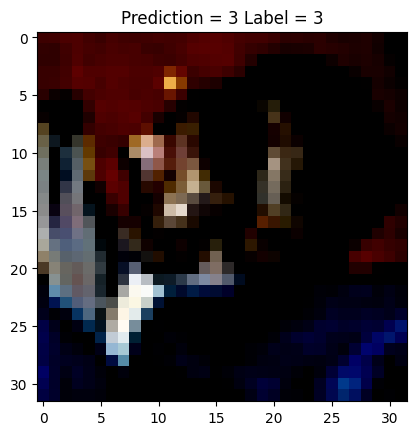

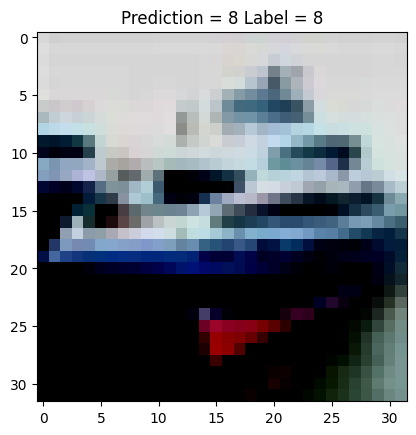

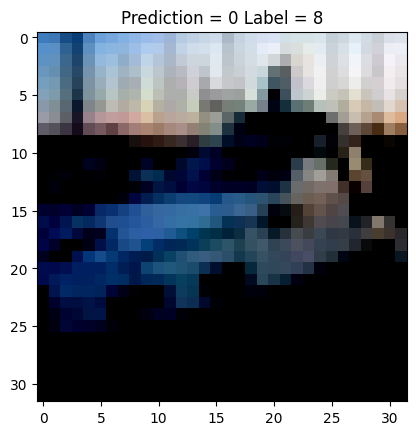

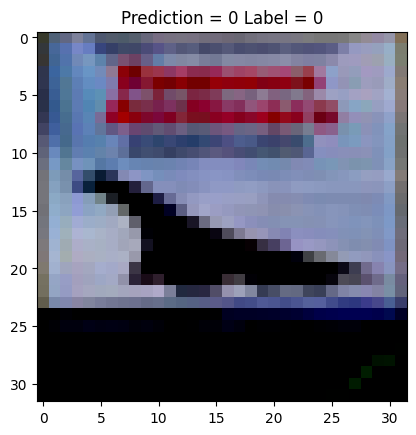

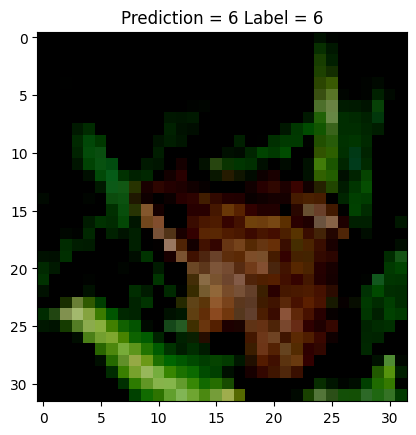

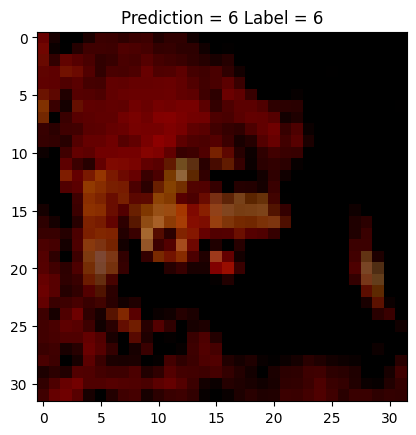

In [ ]:
x, y = next(iter(test_loader))
x, y = x.to(device), y.to(device)  # CUDA compatibility
out = net(x)
pred = out.argmax(dim=1)
plot_image(x.detach().cpu().numpy(), pred, y)   # plot images and labels